<a href="https://www.kaggle.com/code/yasin328000/heart-disease-prediction?scriptVersionId=242763296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Heart Disease Analysis: Insights and Predictive Trends**

## **Overview**
This analysis examines the patterns and relationships within heart disease data, revealing key factors that contribute to its occurrence. By examining various variables, we aim to identify trends that could aid in predicting heart disease risks.

## **Key Focus Areas**
- **Demographic Distribution:** Assessing the prevalence of heart disease across different age groups and sexes to identify high-risk populations.
- **Correlation Analysis:** Investigating the relationships between various health indicators and heart disease occurrence.
- **Predictive Trends:** Detecting significant patterns that could contribute to early prediction and preventive healthcare strategies.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Gender: Biological sex of the patient (The male is set to 1 and the female to 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## **Demographic Distribution Analysis**

In [5]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]

df["Age_group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

dd = df.groupby(["Result", "Gender", "Age_group"], observed=True).size()

print(dd)

Result    Gender  Age_group
negative  0       0-20           1
                  21-40         34
                  41-60         81
                  61-80         82
                  81-100         4
          1       0-20           1
                  21-40         57
                  41-60        152
                  61-80         93
                  81-100         4
positive  0       0-20           2
                  21-40         12
                  41-60         85
                  61-80        133
                  81-100        13
          1       21-40         45
                  41-60        229
                  61-80        273
                  81-100        15
dtype: int64


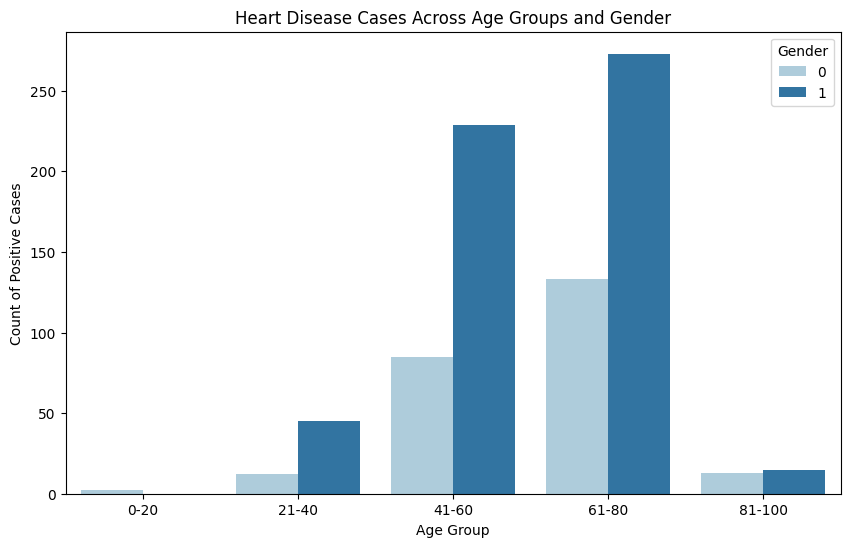

In [6]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Filter data for positive heart disease cases
df_filtered = df[df["Result"] == "positive"]

# Group by Age and Gender, counting occurrences
df_grouped = df_filtered.groupby(["Age_group", "Gender"], observed=True)["Result"].count().reset_index()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="Age_group", y="Result", hue="Gender", palette="Paired")


plt.title("Heart Disease Cases Across Age Groups and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count of Positive Cases")
plt.legend(title="Gender")
plt.show()


##  **Correlation Analysis**

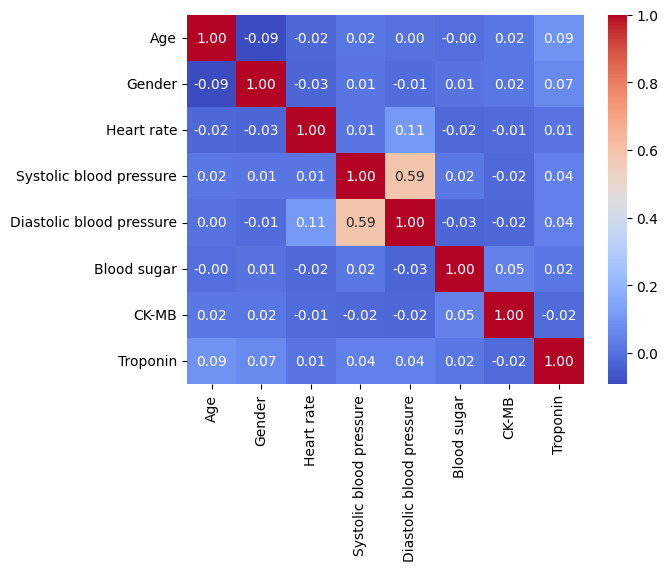

In [7]:
ndf = df.select_dtypes(include=["number"])
corr=ndf.corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

## **Predictive Trend Analysis**

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop("Result", axis=1).drop("Age_group",axis=1)
y = df["Result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9810606060606061
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [12]:
new_patient = pd.DataFrame([{
    'Age': 55,
    'Gender': 1,
    'Heart rate': 66,
    'Systolic blood pressure': 160,
    'Diastolic blood pressure': 70,
    'Blood sugar': 150,
    'CK-MB': 1.80,
    'Troponin': 0.012,
}])

prediction = model.predict(new_patient)
decoded_prediction = label_encoders["Result"].inverse_transform([prediction[0]])

print("Predicted Heart Disease:", decoded_prediction[0])


Predicted Heart Disease: negative
